In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

# Chemin vers le répertoire des données d'entraînement
data_dir = r'C:\Users\33658\Documents\DataSet'

batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 199 files belonging to 2 classes.
Using 160 files for training.
Found 199 files belonging to 2 classes.
Using 39 files for validation.
['Tom Cruise Crop', 'Tom Hanks Crop']


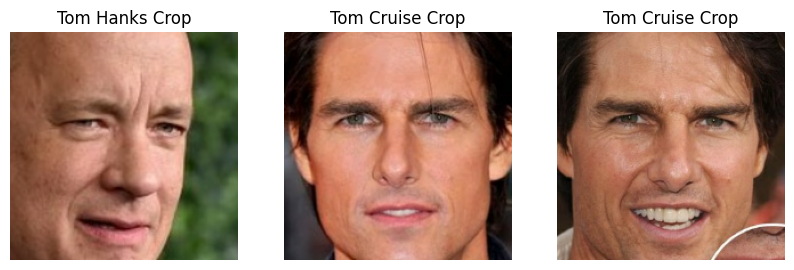

In [75]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [86]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 2

# Définir le modèle avec une couche Input
model = tf.keras.Sequential([
    layers.Input(shape=(200, 200, 3)),  # Couche d'entrée explicite
    layers.Rescaling(1./255),          # Normalisation des données
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compilation
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),  # since softmax is used
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# TensorBoard Callback
logdir = "logs"
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True,  # Sauvegarder les images
)

# Entraînement
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.5845 - loss: 0.7129 - val_accuracy: 0.4615 - val_loss: 0.6933
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.5218 - loss: 0.6998 - val_accuracy: 0.6154 - val_loss: 0.6404
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.6776 - loss: 0.6318 - val_accuracy: 0.5385 - val_loss: 1.0557
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.5873 - loss: 0.7024 - val_accuracy: 0.7949 - val_loss: 0.5077
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.8818 - loss: 0.4038 - val_accuracy: 0.8462 - val_loss: 0.3307
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.8544 - loss: 0.3745 - val_accuracy: 0.8205 - val_loss: 0.3782
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.8773 - loss: 0.3133 - val_accuracy: 0.8462 - val_loss: 0.3004
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.8769 - loss: 0.4002 - val_accu

In [87]:
model.summary()
val_loss, val_accuracy = model.evaluate(train_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 197, 197, 128)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_56 (MaxPooling2D) │ (None, 98, 98, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 95, 95, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 44, 44, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 19, 19, 16)     │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        83,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 790,712 (3.02 MB)

 Trainable params: 263,570 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 527,142 (2.01 MB)

54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9193 - loss: 0.1824
Validation Loss: 0.1665658950805664
Validation Accuracy: 0.9375


In [84]:
# Sauvegarder le modèle en format natif Keras
model.save("my_model.keras")
print("Modèle sauvegardé sous 'my_model.keras'")


Modèle sauvegardé sous 'my_model.keras'


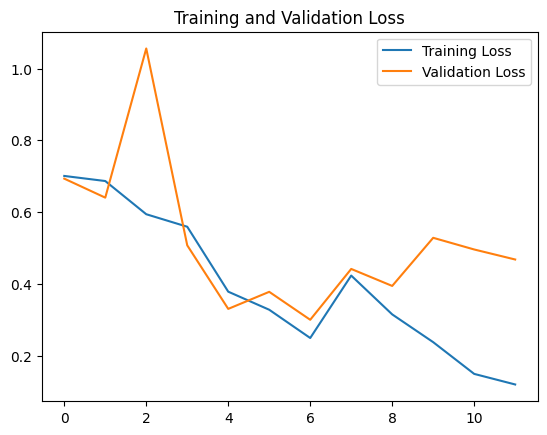

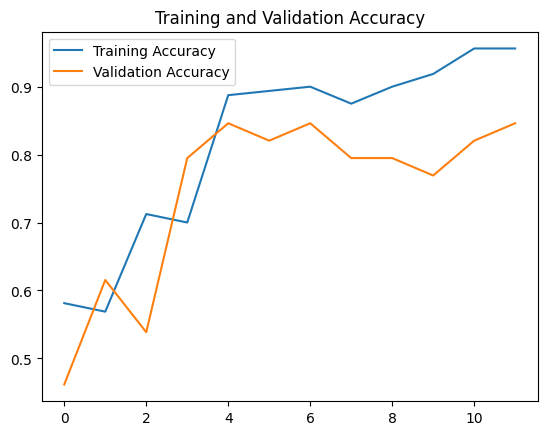

In [88]:
import matplotlib.pyplot as plt

# Courbe de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Courbe de précision (si surveillée)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()


Modèle chargé avec succès.


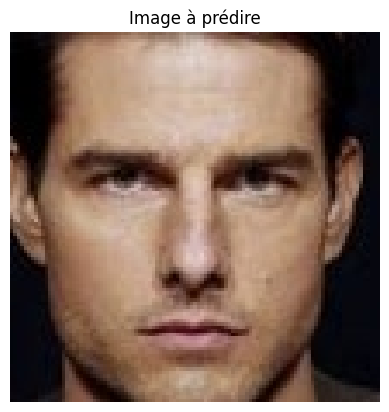

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Classe prédite : Tom Hanks Crop
Confiance : 0.59


In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model_path = "my_model.keras"  # Remplacez par le chemin vers votre fichier de modèle
model = load_model(model_path)
print("Modèle chargé avec succès.")

# Classes
class_names = ['Tom Cruise Crop', 'Tom Hanks Crop']  # Remplacez par vos classes

# Chemin de l'image
image_path = r'C:\Users\33658\Downloads\019_99363fad_face_1.jpg'

# Charger l'image
image_to_predict = cv2.imread(image_path, cv2.IMREAD_COLOR)
if image_to_predict is None:
    print(f"Erreur : Impossible de charger l'image depuis {image_path}")
else:
    # Afficher l'image originale
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.title("Image à prédire")
    plt.axis('off')
    plt.show()

    # Prétraitement de l'image
    img_to_predict = cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB)  # Convertir en RGB si nécessaire
    img_to_predict = cv2.resize(img_to_predict, (200, 200))  # Redimensionner
    img_to_predict = img_to_predict / 255.0  # Normalisation
    img_to_predict = np.expand_dims(img_to_predict, axis=0)  # Ajouter une dimension batch

    # Prédiction
    predictions = model.predict(img_to_predict)
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)

    # Afficher les résultats
    threshold = 0.5
    if confidence >= threshold:
        print(f"Classe prédite : {class_names[predicted_class]}")
        print(f"Confiance : {confidence:.2f}")
    else:
        print("Le modèle est incertain de cette prédiction.")
